# hackStat 2.0 - First Round Competitions

The dataset consists of observations belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

Citation: Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)

### Description of attached files

1. Trainset.csv - the training data set. (including the response          variable Revenue)

2. xtest.csv - the predictors of the test set.

3. sample_submission.csv - a sample submission file in the correct          format. This should contain both the ID and predicted outcome (0- No     revenue generated, 1- Revenue generated) and should have the headings    as "ID”, "Revenue".

### Data Fields
**Online Shoppers Purchasing Intention Dataset**

1. ID - An anonymous id unique to a given customer (only included in the test dataset for the purpose of predictions)
2. Homepage - Number of different types of pages visited by the visitor in the Home page section.
3. Homepage _Duration - Total time spent in the Home page section.
4. Aboutus - Number of different types of pages visited by the visitor in the About us section.
5. Aboutus_Duration - Total time spent in the About us section
6. Contactus - Number of different types of pages visited by the visitor in the Contact us section.
7. Contactus_Duration - Total time spent in the Contact us section
8. BounceRates - Percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
9. ExitRates - From all pageviews to the page, the percentage that were the last in the session
10. PageValues - The average value for a web page that a user visited before completing a transaction
11. SpecialDay - The closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
12. Month - The month of the year (Nominal)
13. OperatingSystems - Operating system used (Nominal)
14. Browser - Browser used (Nominal)
15. Province - Province of the visitor (Nominal)
16. TrafficType - The number of times the visitor visited the site
17. VisitorType - Visitor type as returning, new visitor or other (Categorical)
18. Weekend - Visited during a weekend or not, (a Boolean value- Categorical)
19. Revenue - Revenue will be generated or not
20. Response variable (Desired Target) Categorical: 0 – No revenue generated, 1- revenue generated)

### Importing the required Libraries and setting up the Seaborn and Pandas Options

In [1]:
# Importing required packages
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setting up Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Setting up Seaborn
sns.set_style("whitegrid")
#sns.set_context("poster")

%matplotlib inline

In [2]:
#adding css class for better 
from IPython.core.display import HTML
css = open('data/style-table.css').read() + open('data/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Available data

In [3]:
#Importing the Data Sets

## Importing the Training set values.
training_values = pd.read_csv('data/hackstat2k19/Trainset.csv', encoding = 'iso-8859-1')

## Importing the Testing set values for validating the trained model.
test = pd.read_csv('data/hackstat2k19/xtest.csv', encoding = 'iso-8859-1')

> Let us now look at the Data, and try to understand the Features and data trends.

In [4]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

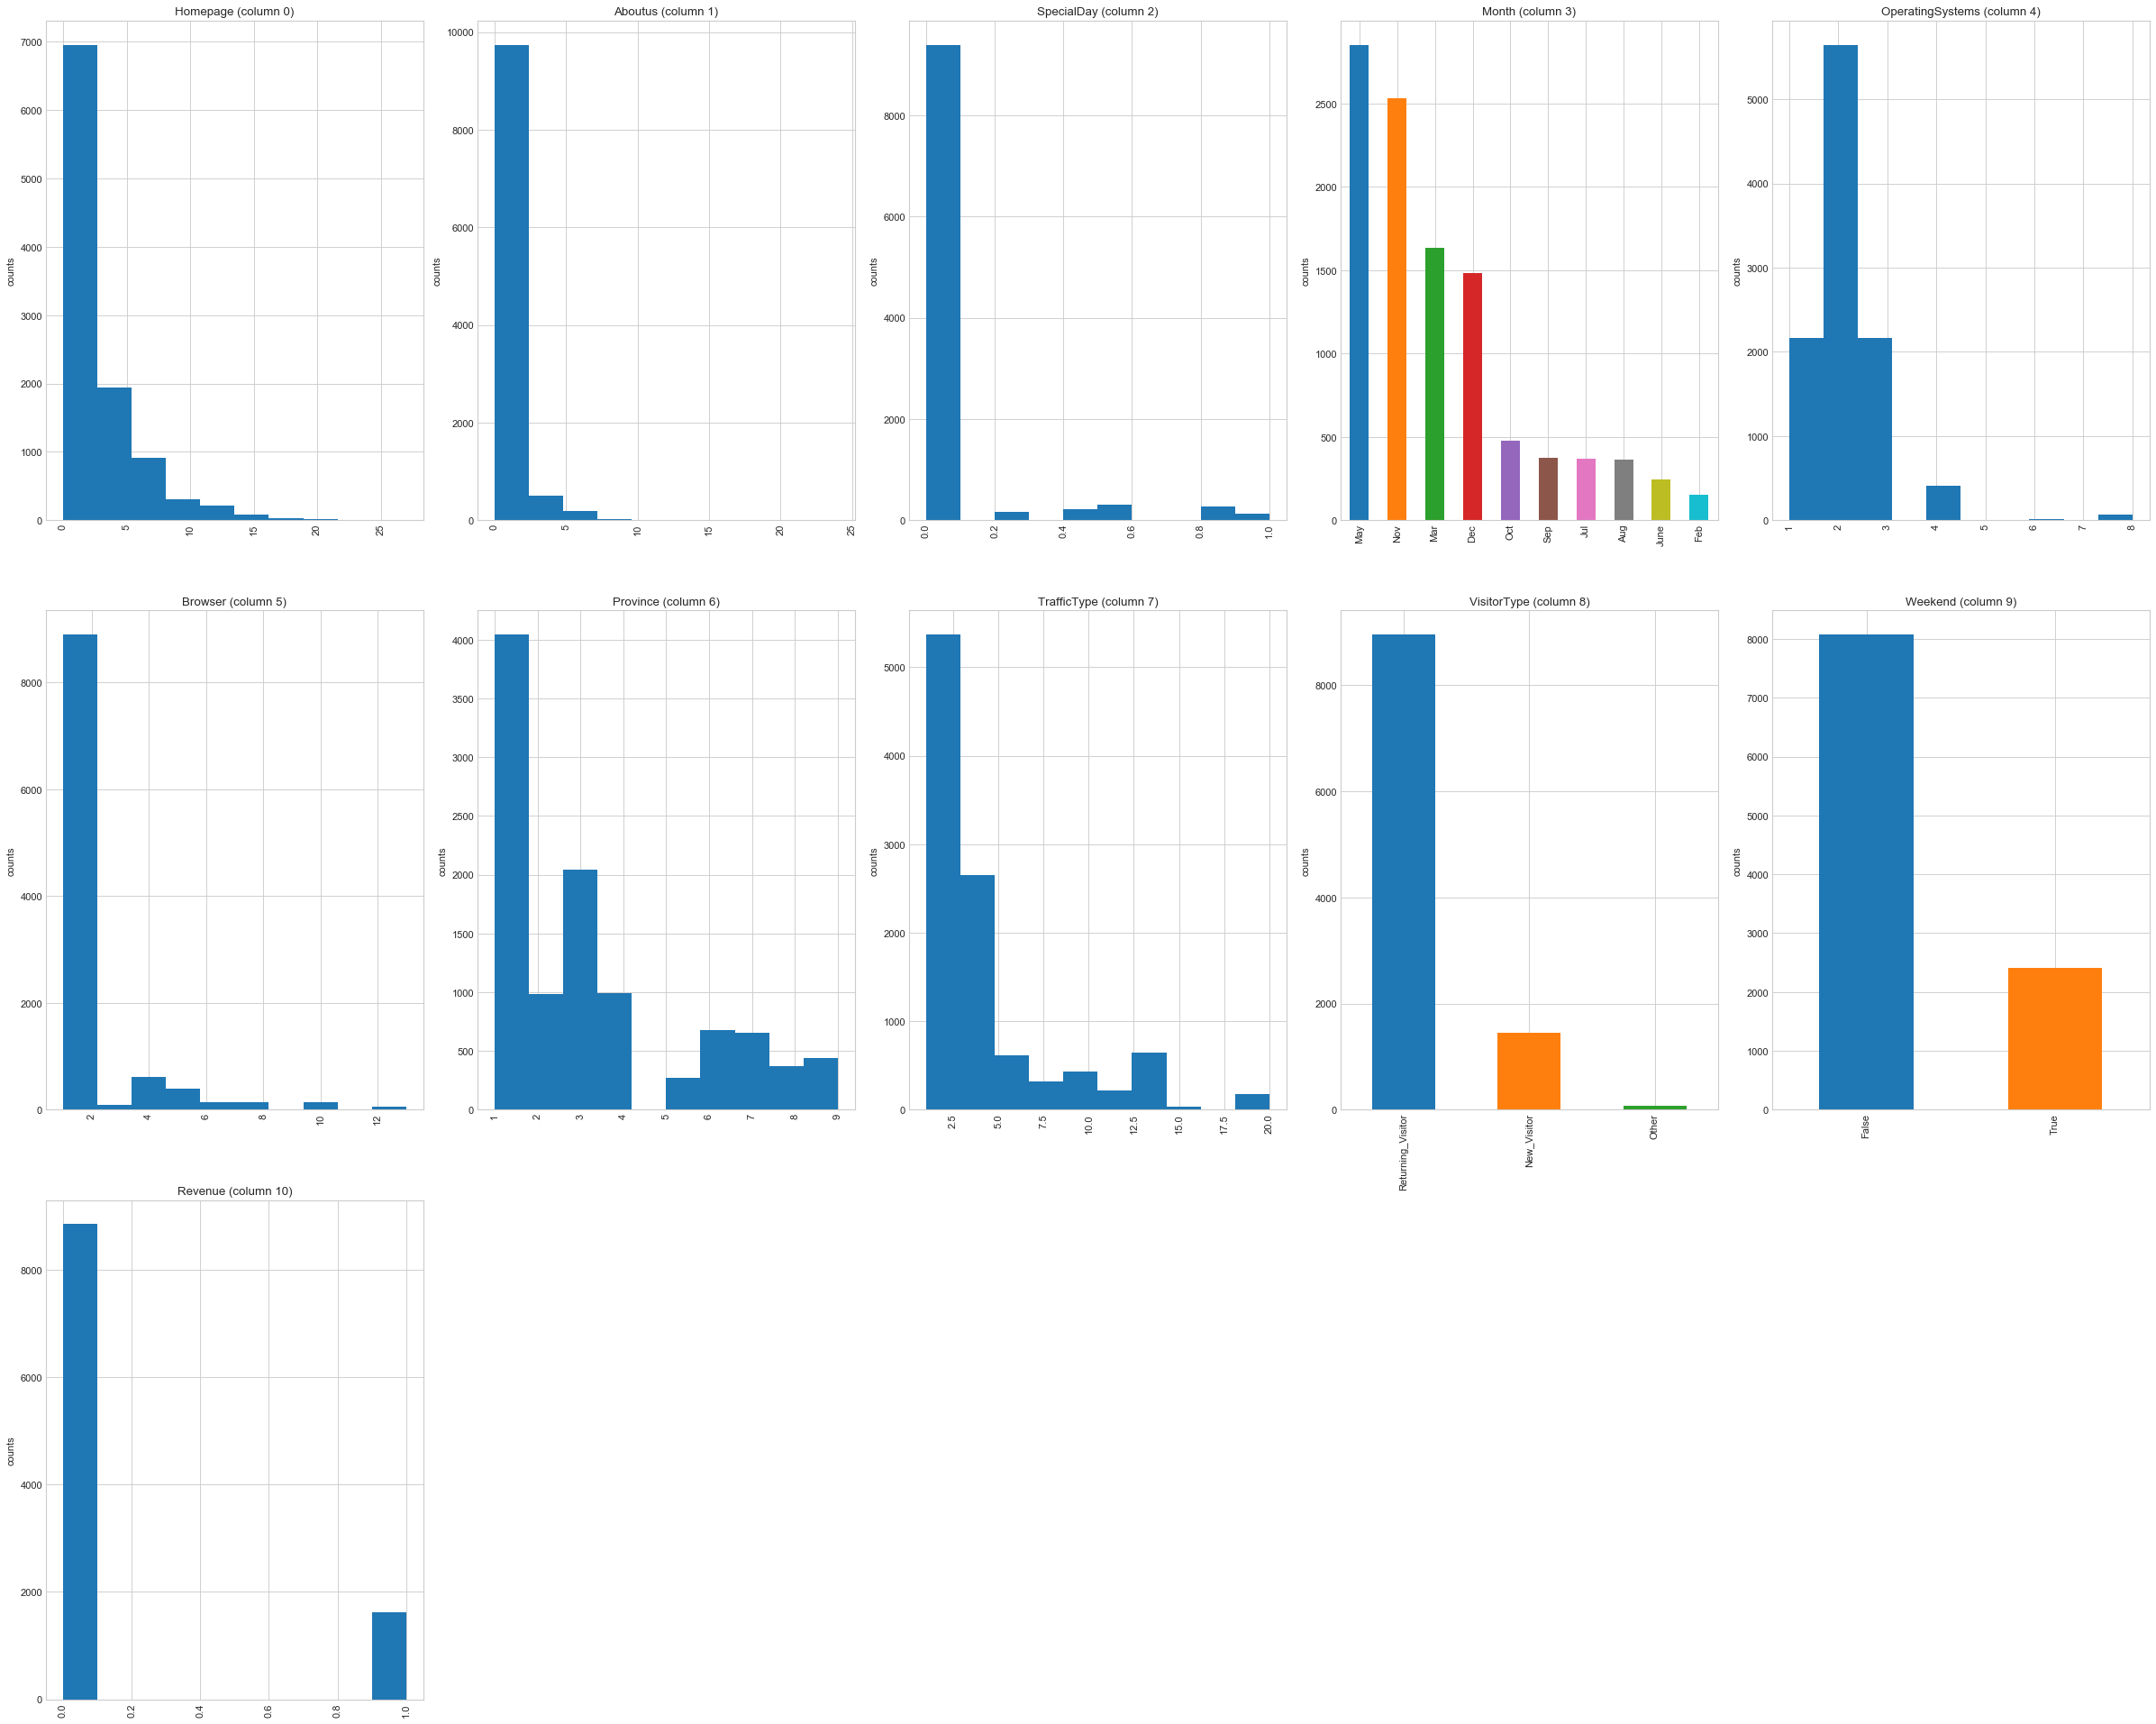

In [5]:
plotPerColumnDistribution(training_values, 40, 5)

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

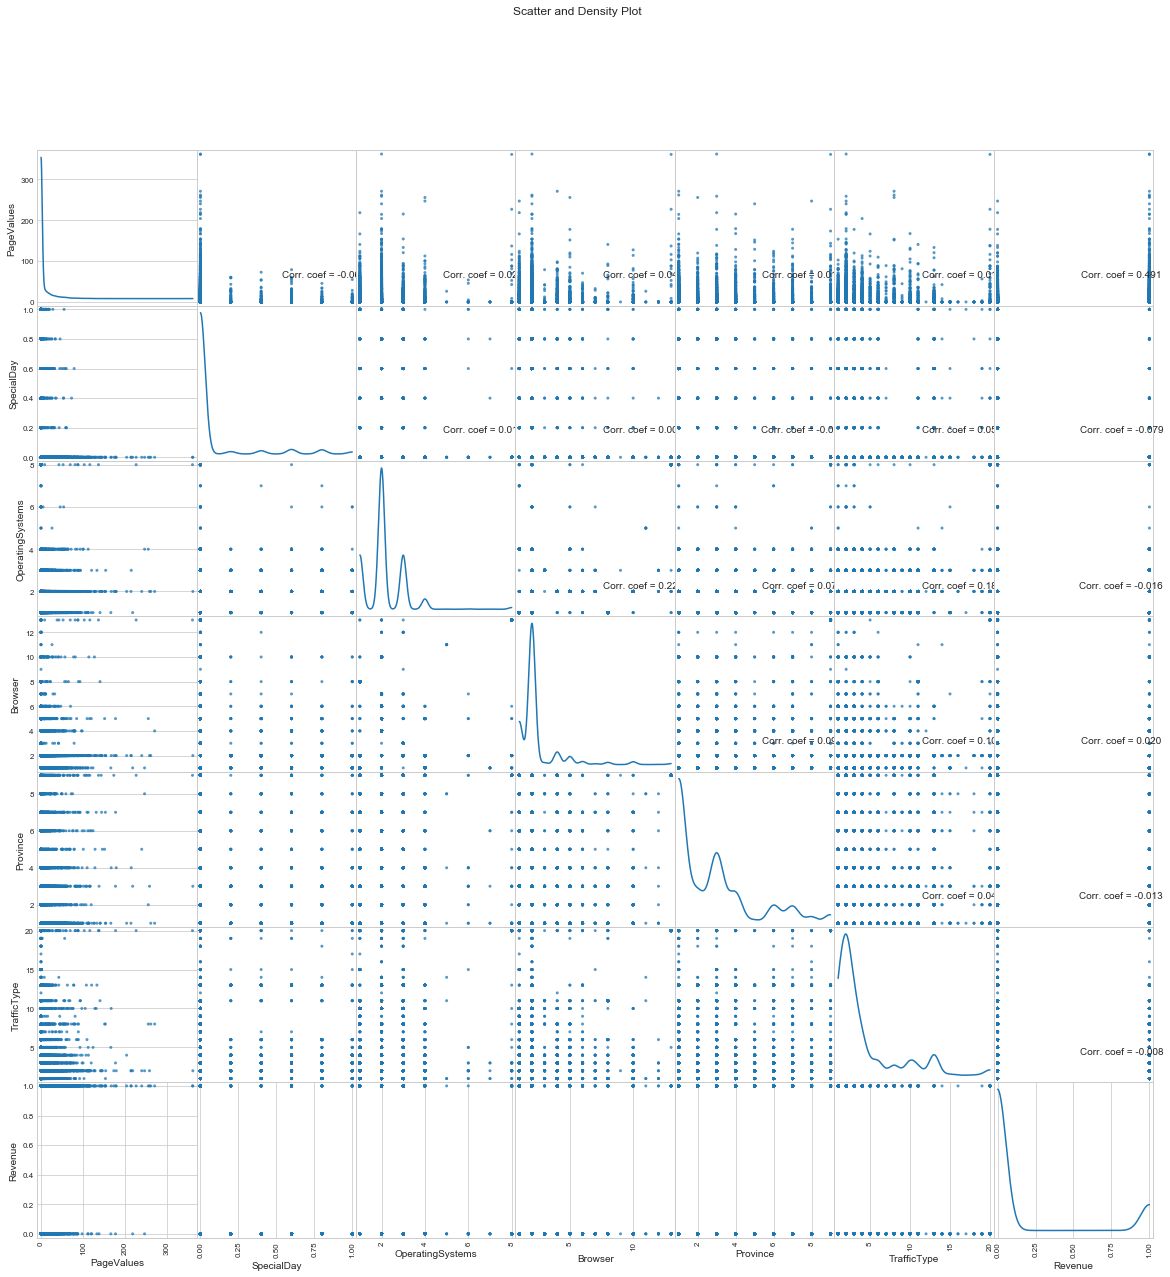

In [7]:
plotScatterMatrix(training_values, 20, 10)

In [8]:
training_values.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,2,2,9,10,Returning_Visitor,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,2,4,4,2,Returning_Visitor,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,1,1,1,3,New_Visitor,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,0


> Let us look at all the available Features or can be called as Data Dictionary.

In [9]:
list(training_values.columns.values)

['Homepage',
 'Homepage _Duration',
 'Aboutus',
 'Aboutus_Duration',
 'Contactus',
 'Contactus_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Province',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

> __ Above are the available Features in our data set.__

In [10]:
training_values.Revenue.value_counts()

0    8858
1    1622
Name: Revenue, dtype: int64

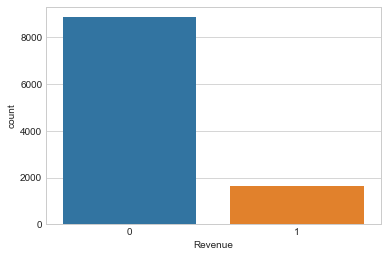

In [11]:
sns.countplot(training_values['Revenue'])

In [12]:
training_values.Revenue.value_counts()/len(training_values.Revenue)

0    0.845229
1    0.154771
Name: Revenue, dtype: float64

> __By the above result, we can say that 
there are 84.5% of No revenue generated, 15.4% of Revenue generated.__

> __By the above figures, we can roughly estimate that there is 15.4 % chance that if we take a random record in the database to be a Revenue generated type.__

In [13]:
training_df = training_values

In [14]:
training_df.head(5)

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,2,2,9,10,Returning_Visitor,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,2,4,4,2,Returning_Visitor,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,1,1,1,3,New_Visitor,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,0


### Before analyzing let us look at the training data we have and check if we have to clean anything.

By looking at the above table we can, 2 of the data available is categorial data. although lets make it sure.

In [15]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 18 columns):
Homepage              10466 non-null float64
Homepage _Duration    10466 non-null float64
Aboutus               10466 non-null float64
Aboutus_Duration      10466 non-null float64
Contactus             10466 non-null float64
Contactus_Duration    10466 non-null float64
BounceRates           10466 non-null float64
ExitRates             10466 non-null float64
PageValues            10480 non-null float64
SpecialDay            10480 non-null float64
Month                 10480 non-null object
OperatingSystems      10480 non-null int64
Browser               10480 non-null int64
Province              10480 non-null int64
TrafficType           10480 non-null int64
VisitorType           10480 non-null object
Weekend               10480 non-null bool
Revenue               10480 non-null int64
dtypes: bool(1), float64(10), int64(5), object(2)
memory usage: 1.4+ MB


> __lets check if each Feature contains any null values or not.__

In [16]:
training_df.apply(lambda x: sum(x.isnull()))

Homepage              14
Homepage _Duration    14
Aboutus               14
Aboutus_Duration      14
Contactus             14
Contactus_Duration    14
BounceRates           14
ExitRates             14
PageValues             0
SpecialDay             0
Month                  0
OperatingSystems       0
Browser                0
Province               0
TrafficType            0
VisitorType            0
Weekend                0
Revenue                0
dtype: int64

#### 8 Columns contain 14 null values each, we can either drop those rows, but lets fill them with the mean value of the column itself.

In [17]:
training_df.mean()

Homepage                 2.326486
Homepage _Duration      79.804088
Aboutus                  0.499618
Aboutus_Duration        34.068975
Contactus               31.793904
Contactus_Duration    1193.624457
BounceRates              0.022300
ExitRates                0.043046
PageValues               5.881370
SpecialDay               0.062118
OperatingSystems         2.125095
Browser                  2.343607
Province                 3.152576
TrafficType              4.088359
Weekend                  0.229294
Revenue                  0.154771
dtype: float64

In [18]:
# training_df = training_df.dropna()
training_df = training_df.fillna(training_df.mean())

In [19]:
training_df.apply(lambda x: sum(x.isnull()))

Homepage              0
Homepage _Duration    0
Aboutus               0
Aboutus_Duration      0
Contactus             0
Contactus_Duration    0
BounceRates           0
ExitRates             0
PageValues            0
SpecialDay            0
Month                 0
OperatingSystems      0
Browser               0
Province              0
TrafficType           0
VisitorType           0
Weekend               0
Revenue               0
dtype: int64

> None of the columns have the null values now.

In [20]:
##lets check the data types again.
cols = training_df.select_dtypes(include = ['object'])
cols.apply(lambda x: len(x.unique()))

Month          10
VisitorType     3
dtype: int64

> We need to normalize Month column and VisitorType column in the dataset.

In [21]:
training_df.Month.value_counts().head(12)

May     2853
Nov     2531
Mar     1636
Dec     1482
Oct      476
Sep      375
Jul      370
Aug      363
June     244
Feb      150
Name: Month, dtype: int64

In [22]:
training_df['Month'] = training_df.Month.map(training_df.Month.value_counts(normalize=True))

In [23]:
training_df.Month.value_counts().head(12)

0.272233    2853
0.241508    2531
0.156107    1636
0.141412    1482
0.045420     476
0.035782     375
0.035305     370
0.034637     363
0.023282     244
0.014313     150
Name: Month, dtype: int64

In [24]:
training_df.VisitorType.value_counts().head(12)

Returning_Visitor    8960
New_Visitor          1447
Other                  73
Name: VisitorType, dtype: int64

In [25]:
training_df['VisitorType'] = training_df.VisitorType.map(training_df.VisitorType.value_counts(normalize=True))

In [26]:
training_df.VisitorType.value_counts().head(12)

0.854962    8960
0.138073    1447
0.006966      73
Name: VisitorType, dtype: int64

In [27]:
training_df.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,0.141412,2,2,9,10,0.854962,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,0.272233,2,4,4,2,0.854962,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,0.156107,2,2,3,2,0.854962,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,0.035782,1,1,1,3,0.138073,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,0.272233,2,2,1,1,0.854962,False,0


### As we have worked on our Training data set and performed some data wrangling, we have to perform the same operations on our test data set to make our modeling easier.

In [28]:
test = test.fillna(test.mean())
test['Month'] = test.Month.map(test.Month.value_counts(normalize=True))
test['VisitorType'] = test.VisitorType.map(test.VisitorType.value_counts(normalize=True))

In [29]:
test.head()

,ID,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,0.276216,1,1,1,1,0.860000,False
1,2,0,0.0,0,0.0,24,743.750000,0.000000,0.016667,0.0,0.0,0.132432,2,2,2,2,0.133514,True
2,3,0,0.0,0,0.0,13,129.500000,0.015385,0.053846,0.0,0.0,0.252432,2,2,3,1,0.860000,False
3,4,3,84.0,0,0.0,59,1720.422222,0.026984,0.038232,0.0,0.0,0.039459,3,2,1,3,0.860000,True
4,5,0,0.0,0,0.0,13,390.500000,0.038462,0.053846,0.0,0.0,0.132432,2,2,1,13,0.860000,False


### Now that we have cleaned our training and test datasets, export the datasets to csv files so that we can use it for fitting into our model.

In [30]:
training_df.to_csv('data/training_data.csv', index=True)
training_df.shape

(10480, 18)

In [31]:
test.to_csv('data/test_data.csv', index=True)
test.shape

(1850, 18)

In [32]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [33]:
training_df.head()

,Homepage,Homepage _Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,0.141412,2,2,9,10,0.854962,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,0.272233,2,4,4,2,0.854962,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,0.156107,2,2,3,2,0.854962,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,0.035782,1,1,1,3,0.138073,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,0.272233,2,2,1,1,0.854962,False,0


In [34]:
training_df.dataframeName = 'Training Data'

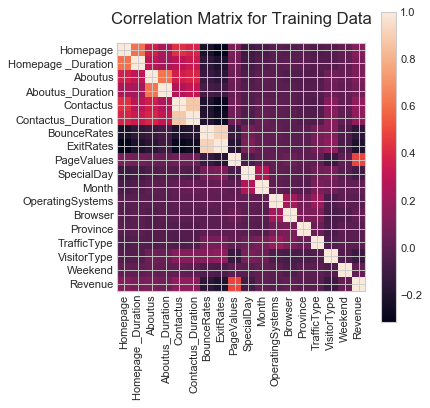

In [35]:
plotCorrelationMatrix(training_df, 5)